# Neural Network (Feedforward) for heart disease data (low/hight risk)

[Read more about NNs by clicking here.](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

Import locally required modules.

In [13]:
# Add local modules' path
# Restart notebook if you modify these imports' files
import os
import sys

module_path = os.path.abspath(os.path.join("..", "common"))

if module_path not in sys.path:
    sys.path.append(module_path)

# Actual imports
from common import kUtils

Let's normalize our age column.

In [14]:
from sklearn.preprocessing import MinMaxScaler

kUtils.get_loaded_data()

kUtils._loaded_data["Age"] = MinMaxScaler().fit_transform(kUtils._loaded_data[['Age']])

Get the split data.

In [15]:
import numpy as np # Used here only for the data type but extensively used later

X_train: np.ndarray; X_test: np.ndarray; X_val: np.ndarray; y_train: np.ndarray; y_test: np.ndarray; y_val: np.ndarray;

X_train, X_test, X_val, y_train, y_test, y_val = kUtils.get_split_data()

Set up the model and train it.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf: MLPClassifier = MLPClassifier(
        solver="adam",
        alpha=1e-5,
        hidden_layer_sizes=(16,8),
        activation="relu", 
        random_state=42, 
        max_iter=200,
    )

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 8), random_state=42)

### Metrics

In [17]:
from sklearn.metrics import accuracy_score, accuracy_score, mean_squared_error, classification_report, confusion_matrix

y_pred: np.ndarray = clf.predict(X_test)

score: float = clf.score(X=X_test, y=y_test)
accuracy: float = accuracy_score(y_true=y_test, y_pred=y_pred)
mse: float | np.ndarray = mean_squared_error(y_true=y_test, y_pred=y_pred)
c_report: str | dict = classification_report(y_true=y_test, y_pred=y_pred)
c_matrix: np.ndarray = confusion_matrix(y_true=y_test, y_pred=y_pred)

print("Score:", score)
print("Accuracy:", accuracy)
print("Mean squared error:", mse)
print("Classification report:\n", c_report)
print("Confusion matrix:\n", c_matrix)

Score: 0.9909285714285714
Accuracy: 0.9909285714285714
Mean squared error: 0.00907142857142857
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6991
         1.0       0.99      0.99      0.99      7009

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion matrix:
 [[6925   66]
 [  61 6948]]


### Plotting the model

The high dimensional data can be reduced to a 2D representation through applying a PCA.

In [18]:
from sklearn.decomposition import PCA

pca: PCA = PCA(n_components=2)
X_pca: np.ndarray = pca.fit_transform(X_train)

**NOTE:** The next part describes how much the 2 PC's explain of the variance. This is not necessarily important. What is important is that it can be visualised what a decision boundary of a neural network could look like. Of course, this is not the actual decision boundary, but it will hopefully give you an idea of the weird structure a neural network can take.

In [19]:
explained_variance: np.ndarray = pca.explained_variance_ratio_ * 100

print(f"PC1 explains {explained_variance[0]:.2f}% of the variance")
print(f"PC2 explains {explained_variance[1]:.2f}% of the variance")
print(f"Variance explained by all principal components: {pca.explained_variance_ratio_.sum() * 100:.2f}")

PC1 explains 29.28% of the variance
PC2 explains 5.24% of the variance
Variance explained by all principal components: 34.53


We need a new classifier to be able to represent the 2D decision boundary.

In [20]:
clf_2d: MLPClassifier = MLPClassifier(
        solver="adam",
        alpha=1e-5,
        hidden_layer_sizes=(16,8),
        activation="relu",
        random_state=42,
        max_iter=200,
    )

clf_2d.fit(X_pca, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 8), random_state=42)

Let's set up our points to plot.

In [21]:
h: float; x_min: float; x_max: float; y_min: float; y_max: float;

h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx: np.ndarray; yy: np.ndarray; grid_points: np.ndarray; probs: np.ndarray;

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]

probs = clf_2d.predict_proba(grid_points)[:, 1].reshape(xx.shape)

Time to plot it all together!

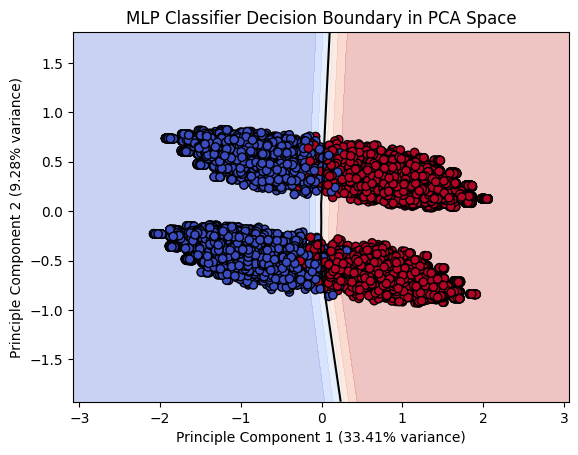

In [22]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.contour import QuadContourSet

fig: Figure; ax: plt.Axes;

fig, ax = plt.subplots()

ax.contourf(xx, yy, probs, cmap=plt.cm.coolwarm, alpha=0.3)
ax.contour(xx, yy, probs, levels=[0.5], colors="k", linestyles="-") # Decision boundary
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.coolwarm)

ax.set_xlabel("Principle Component 1 (33.41% variance)")
ax.set_ylabel("Principle Component 2 (9.28% variance)")
ax.set_title("MLP Classifier Decision Boundary in PCA Space")

plt.show()

Let's validate our model.

In [ ]:
y_pred = clf.predict(X_val)

score = clf.score(X=X_val, y=y_val)
accuracy = accuracy_score(y_true=y_val, y_pred=y_pred)
mse = mean_squared_error(y_true=y_val, y_pred=y_pred)
c_report = classification_report(y_true=y_val, y_pred=y_pred)
c_matrix = confusion_matrix(y_true=y_val, y_pred=y_pred)

print("Score:", score)
print("Accuracy:", accuracy)
print("Mean squared error:", mse)
print("Classification report:\n", c_report)
print("Confusion matrix:\n", c_matrix)

Score: 0.9907142857142858
Accuracy: 0.9907142857142858
Mean squared error: 0.009285714285714286
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10426
         1.0       0.99      0.99      0.99     10574

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000

Confusion matrix:
 [[10325   101]
 [   94 10480]]
